In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
data['MDEV'] = boston.target
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
data.shape

(506, 14)

In [5]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

In [6]:
data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


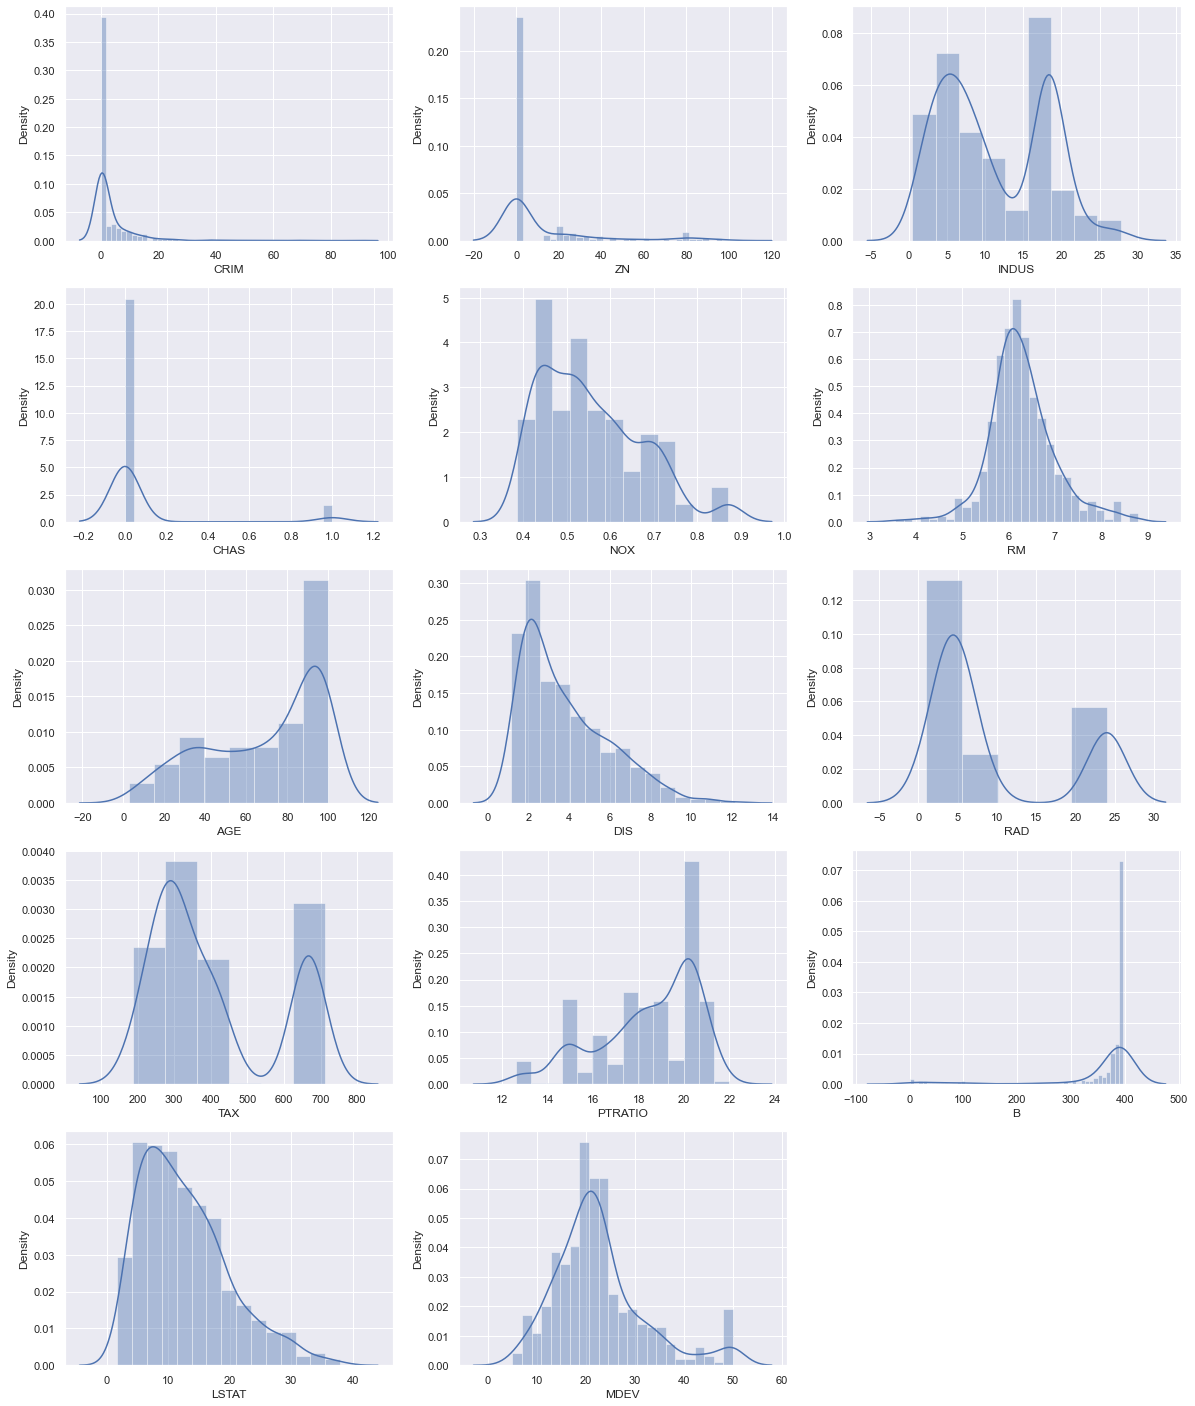

In [7]:
# let's see how data is distributed
plt.figure(figsize=(20,25))
pltnum = 1
for column in data:
    if pltnum <= 15:
        ax = plt.subplot(5,3,pltnum)
        sns.distplot(data[column])
    pltnum += 1
plt.show()

<AxesSubplot:>

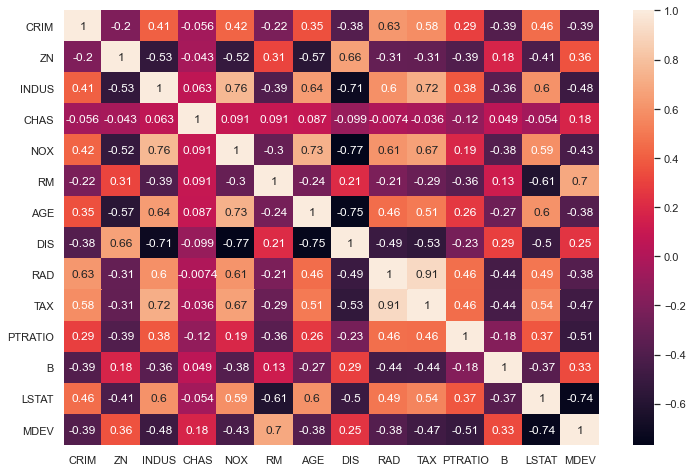

In [62]:
# let's check the correlation
correlation_mat = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_mat, annot=True)

<AxesSubplot:>

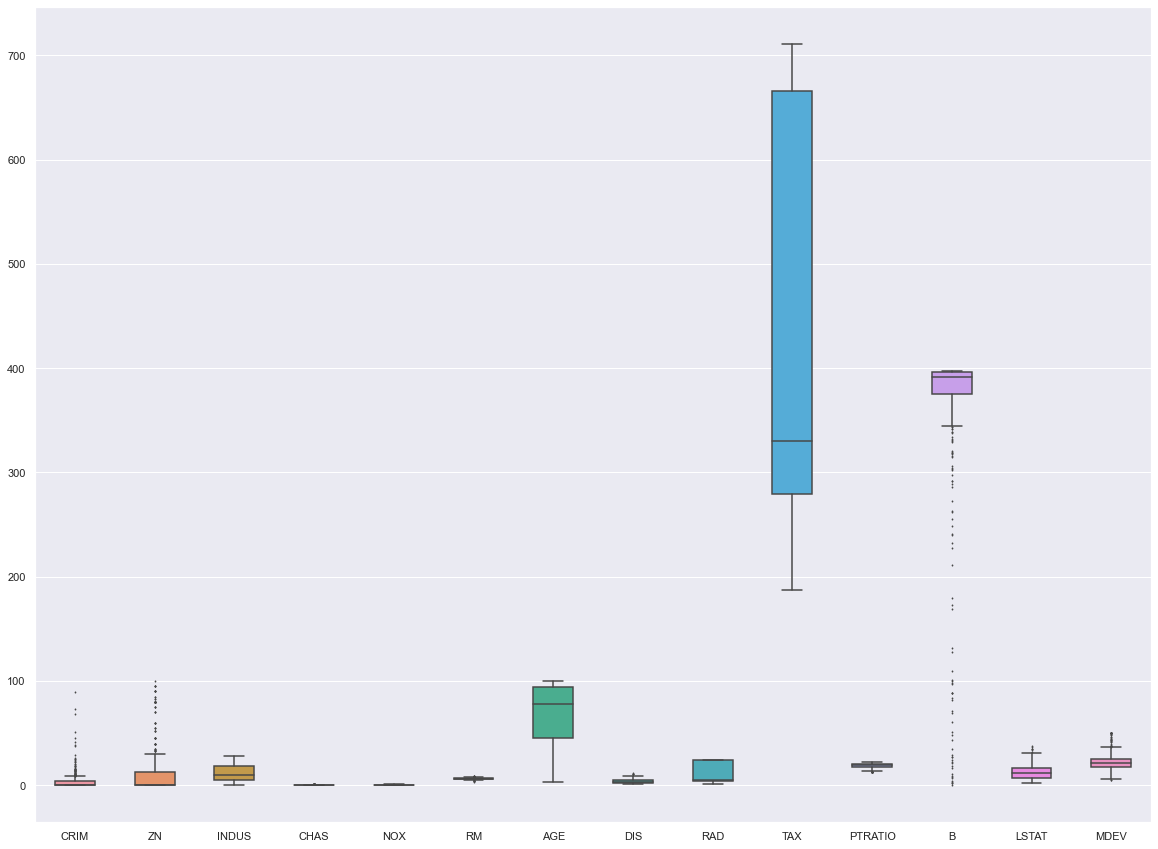

In [63]:
# check for outliers
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=1)

One column **B** has high outliers, but lets check how much it is impacting in Feature Selection using statsmodels.

## Feature Selection

In [65]:
fs1 = smf.ols("MDEV ~ CRIM + ZN + INDUS + RAD + TAX + LSTAT + PTRATIO + AGE", data=data).fit()
print(f"R-square: {fs1.rsquared}")
print(f"Adj. R-square: {fs1.rsquared_adj}")

R-square: 0.6403373183260006
Adj. R-square: 0.634547979385574


In [66]:
fs2 = smf.ols("MDEV ~ CRIM + ZN + INDUS + RAD + TAX + LSTAT + PTRATIO", data=data).fit()
print(f"R-square: {fs2.rsquared}")
print(f"Adj. R-square: {fs2.rsquared_adj}")

R-square: 0.6290862585433541
Adj. R-square: 0.623872611575088


In [67]:
fs3 = smf.ols("MDEV ~ INDUS + RAD + TAX + LSTAT + PTRATIO", data=data).fit()
print(f"R-square: {fs3.rsquared}")
print(f"Adj. R-square: {fs3.rsquared_adj}")

R-square: 0.624488747724445
Adj. R-square: 0.6207336352016894


In [68]:
fs4 = smf.ols("MDEV ~ AGE + ZN + INDUS + RAD + TAX + LSTAT + PTRATIO", data=data).fit()
print(f"R-square: {fs4.rsquared}")
print(f"Adj. R-square: {fs4.rsquared_adj}")

R-square: 0.6355786375538747
Adj. R-square: 0.6304562489251139


In [69]:
fs5 = smf.ols("MDEV ~ CRIM + ZN + INDUS + RAD + TAX + LSTAT + PTRATIO + AGE + NOX + DIS + RM", data=data).fit()
print(f"R-square: {fs5.rsquared}")
print(f"Adj. R-square: {fs5.rsquared_adj}")

R-square: 0.7285642659832583
Adj. R-square: 0.7225201504484726


In [70]:
fs6 = smf.ols("MDEV ~ CRIM + ZN + INDUS + RAD + TAX + LSTAT + PTRATIO + B + NOX + DIS + RM", data=data).fit()
print(f"R-square: {fs6.rsquared}")
print(f"Adj. R-square: {fs6.rsquared_adj}")

R-square: 0.7354930382923394
Adj. R-square: 0.7296032071611971


In [71]:
fs7 = smf.ols("MDEV ~ ZN + INDUS + RAD + B + RM + CHAS", data=data).fit()
print(f"R-square: {fs7.rsquared}")
print(f"Adj. R-square: {fs7.rsquared_adj}")

R-square: 0.5930461433179961
Adj. R-square: 0.5881529105723207


We can see that if we can drop the column **B**,  it makes not much difference in Adj-R-square value.

## Multi Colinearity

In [72]:
X = data.drop(columns=['MDEV', 'CHAS', 'B'])
y = data['MDEV']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
vif = pd.DataFrame()

variables = X_scaled
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.761839,CRIM
1,2.297916,ZN
2,3.946114,INDUS
3,4.365205,NOX
4,1.911242,RM
5,3.079151,AGE
6,3.952905,DIS
7,7.364313,RAD
8,8.866477,TAX
9,1.781812,PTRATIO


In [74]:
# train the model
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=355)

In [75]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [76]:
# create a function for adj-r-sq
def adj_R(x,y):
    r2 = regression.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [77]:
print(f"R-square: {regression.score(x_train, y_train)}")
print(f"Adj R-square: {adj_R(x_train, y_train)}")

R-square: 0.7135219460026734
Adj R-square: 0.7049354103242793


In [78]:
print(f"R-square: {regression.score(x_test, y_test)}")
print(f"Adj R-square: {adj_R(x_test, y_test)}")

R-square: 0.7592818807272528
Adj R-square: 0.7362566693185553


In [79]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lassCV = LassoCV(alphas=None, cv=10, max_iter=100000 ,normalize=True)
lassCV.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [80]:
alpha = lassCV.alpha_
alpha

0.0008987575008459959

In [81]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0008987575008459959)

In [82]:
lasso_reg.score(x_test, y_test)

0.7592018355036909

In [83]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [84]:
elasticCV.alpha_

0.013238147250836645

In [85]:
elasticCV.l1_ratio

0.5

In [86]:
elastic = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=0.5)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.013238147250836645)

In [87]:
elastic.score(x_test, y_test)

0.75703644155004

In [88]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([5.04777185, 0.36839249, 4.47724567, 4.76563556, 9.07090607,
       3.69879713, 0.5283658 , 7.29366605, 3.26380885, 5.34917664,
       2.95557449, 4.07703612, 6.87737734, 5.86599277, 9.95018857,
       4.65504776, 5.46490618, 4.18605091, 8.5104415 , 9.00984993,
       9.93553224, 0.17299413, 5.4656973 , 1.46401687, 2.26843607,
       7.27706031, 7.94501075, 9.04942797, 6.24554602, 7.91393534,
       2.26567471, 8.85744851, 0.6534    , 6.18548948, 6.99181323,
       5.85783708, 6.38304159, 1.6936631 , 8.96917001, 0.6232113 ,
       2.55353487, 7.4540333 , 6.69873661, 1.58631604, 5.94393999,
       0.10671568, 4.03940678, 6.71960885, 1.46102872, 7.41629429]),
        cv=10, normalize=True)

In [89]:
ridgecv.score(x_test, y_test)

0.7337350100809593